## 1. 广播法则(rule)

广播法则能使通用函数有意义地处理不具有相同形状的输入。

广播第一法则：如果所有的输入数组维度不都相同，一个“1”将被重复地添加在维度较小的数组上直至所有的数组拥有一样的维度。

广播第二法则：确定长度为1的数组沿着特殊的方向表现地好像它有沿着那个方向最大形状的大小。对数组来说，沿着那个维度的数组元素的值理应相同。

# 2. 花哨的索引和索引技巧

Numpy比普通Python序列提供更多的索引功能。除了索引整数和切片，正如我们之前看到的，数组可以被整数数组和布尔数组索引。

通过数组索引

In [1]:
import numpy as np

In [2]:
a = np.arange(12) ** 2
i = np.array([1,1,3,8,5])
a[i]

array([ 1,  1,  9, 64, 25])

In [3]:
a

array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121])

In [4]:
j = np.array([[3,4],[9,7]])
a[j]

array([[ 9, 16],
       [81, 49]])

当被索引数组a是多维的时，每一个唯一的索引数列指向a的第一维5。以下示例通过将图片标签用调色版转换成色彩图像展示了这种行为。

In [5]:
palette = np.array([
    [0,0,0],                # 黑色
    [255,0,0],              # 红色
    [0,255,0],              # 绿色
    [0,0,255],              # 蓝色
    [255,255,255]           # 白色
])

image = np.array([[ 0, 1, 2, 0 ],           # each value corresponds to a color in the palette
               [ 0, 3, 4, 0 ]] )
palette[image]                            # the (2,4,3) color image

array([[[  0,   0,   0],
        [255,   0,   0],
        [  0, 255,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0, 255],
        [255, 255, 255],
        [  0,   0,   0]]])

我们也可以给出不不止一维的索引，每一维的索引数组必须有相同的形状。



In [6]:
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [7]:
i = np.array( [ [0,1],                        # indices for the first dim of a
             [1,2] ] )

In [8]:
j = np.array( [ [2,1],                        # indices for the second dim
             [3,3] ] )

In [9]:
a[i,j]

array([[ 2,  5],
       [ 7, 11]])

In [10]:
a[i,2]

array([[ 2,  6],
       [ 6, 10]])

In [11]:
a[:,j] #按行析取.

array([[[ 2,  1],
        [ 3,  3]],

       [[ 6,  5],
        [ 7,  7]],

       [[10,  9],
        [11, 11]]])

自然，我们可以把i和j放到序列中(比如说列表)然后通过list索引。

In [12]:
l = [i,j]
a[l]# 与 a[i,j] 相等

/A/develop/ide/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


array([[ 2,  5],
       [ 7, 11]])

然而，我们不能把i和j放在一个数组中，因为这个数组将被解释成索引a的第一维。

```python
s = array( [i,j] )
a[s]                                       # not what we want
# ---------------------------------------------------------------------------
# IndexError                                Traceback (most recent call last)
# <ipython-input-100-b912f631cc75> in <module>()
# ----> 1 a[s]

# IndexError: index (3) out of range (0<=index<2) in dimension 0
a[tuple(s)]                                # same as a[i,j]
```

另一个常用的数组索引用法是搜索时间序列最大值6。

In [13]:
time = np.linspace(20, 145, 5)                 # time scale
data = np.sin(np.arange(20)).reshape(5,4)      # 4 time-dependent series
time

array([ 20.  ,  51.25,  82.5 , 113.75, 145.  ])

In [14]:
data

array([[ 0.        ,  0.84147098,  0.90929743,  0.14112001],
       [-0.7568025 , -0.95892427, -0.2794155 ,  0.6569866 ],
       [ 0.98935825,  0.41211849, -0.54402111, -0.99999021],
       [-0.53657292,  0.42016704,  0.99060736,  0.65028784],
       [-0.28790332, -0.96139749, -0.75098725,  0.14987721]])

In [15]:
ind = data.argmax(axis=0)                   # index of the maxima for each series
ind 

array([2, 0, 3, 1])

In [16]:
time_max = time[ind]                       # times corresponding to the maxima
data_max = data[ind, range(data.shape[1])] # => data[ind[0],0], data[ind[1],1]...
time_max

array([ 82.5 ,  20.  , 113.75,  51.25])

In [17]:
data_max

array([0.98935825, 0.84147098, 0.99060736, 0.6569866 ])

In [18]:
np.all(data_max == data.max(axis=0))   # True

True

你也可以使用数组索引作为目标来赋值：

In [19]:
a = np.arange(5)
a

array([0, 1, 2, 3, 4])

In [20]:
a[[1,3,4]]=0
a

array([0, 0, 2, 0, 0])

然而，当一个索引列表包含重复时，赋值被多次完成，保留最后的值：

In [21]:
a = np.arange(5)
a[[0,0,2]]=[1,2,3]
a

array([2, 1, 3, 3, 4])

In [22]:
a = np.arange(5)
a

array([0, 1, 2, 3, 4])

In [23]:
a[[0,0,2]] = [4,3,3]
a

array([3, 1, 3, 3, 4])

In [24]:
a[[0,0,2]] = [1,2,3]
a

array([2, 1, 3, 3, 4])

这足够合理，但是小心如果你想用Python的+=结构，可能结果并非你所期望：

In [26]:
a = np.arange(5)
a[[0,0,2]]+=1
a

array([1, 1, 3, 3, 4])

即使0在索引列表中出现两次，索引为0的元素仅仅增加一次。这是因为Python要求a+=1和a=a+1等同。

## 通过布尔数组索引

当我们使用整数数组索引数组时，我们提供一个索引列表去选择。通过布尔数组索引的方法是不同的我们显式地选择数组中我们想要和不想要的元素。
我们能想到的使用布尔数组的索引最自然方式就是使用和原数组一样形状的布尔数组。

In [29]:
a = np.arange(12).reshape(3,4)
b = a > 4
b

array([[False, False, False, False],
       [False,  True,  True,  True],
       [ True,  True,  True,  True]])

In [30]:
a[b]

array([ 5,  6,  7,  8,  9, 10, 11])

这个属性在赋值时非常有用：

In [31]:
a[b] = 0    # All elements of 'a' higher than 4 become 0
a

array([[0, 1, 2, 3],
       [4, 0, 0, 0],
       [0, 0, 0, 0]])

你可以参考曼德博集合示例看看如何使用布尔索引来生成曼德博集合的图像。

第二种通过布尔来索引的方法更近似于整数索引；对数组的每个维度我们给一个一维布尔数组来选择我们想要的切片。

In [32]:
a = np.arange(12).reshape(3,4)
b1 = np.array([False,True,True])             # first dim selection
b2 = np.array([True,False,True,False])       # second dim selection
a[b1,:]   

array([[ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [33]:
a[:,b2]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

In [34]:
a[b1,b2]

array([ 4, 10])

注意一维数组的长度必须和你想要切片的维度或轴的长度一致，在之前的例子中，b1是一个秩为1长度为三的数组(a的行数)，b2(长度为4)与a的第二秩(列)相一致。

## ix_()函数

`ix_`函数可以为了获得多元组的结果而用来结合不同向量。例如，如果你想要用所有向量a、b和c元素组成的三元组来计算`a+b*c`：

In [37]:
a = np.array([2,3,4,5])
b = np.array([8,5,4])
c = np.array([5,4,6,8,3])
ax,bx,cx = np.ix_(a,b,c)

In [40]:
np.ix_(a,b,c)

(array([[[2]],
 
        [[3]],
 
        [[4]],
 
        [[5]]]), array([[[8],
         [5],
         [4]]]), array([[[5, 4, 6, 8, 3]]]))

In [47]:
ax

array([[[2]],

       [[3]],

       [[4]],

       [[5]]])

In [48]:
bx

array([[[8],
        [5],
        [4]]])

In [49]:
cx

array([[[5, 4, 6, 8, 3]]])

In [44]:
ax.shape, bx.shape, cx.shape

((4, 1, 1), (1, 3, 1), (1, 1, 5))

In [46]:
result =  ax+bx*cx
result

array([[[42, 34, 50, 66, 26],
        [27, 22, 32, 42, 17],
        [22, 18, 26, 34, 14]],

       [[43, 35, 51, 67, 27],
        [28, 23, 33, 43, 18],
        [23, 19, 27, 35, 15]],

       [[44, 36, 52, 68, 28],
        [29, 24, 34, 44, 19],
        [24, 20, 28, 36, 16]],

       [[45, 37, 53, 69, 29],
        [30, 25, 35, 45, 20],
        [25, 21, 29, 37, 17]]])

In [51]:
result[3,2,4] 

17

In [52]:
a[3]+b[2]*c[4] 

17

你也可以实行如下简化：

In [56]:
def ufunc_reduce(ufct, *vectors):
    vs = np.ix_(*vectors)
    r = ufct.identity
    for v in vs:
        r = ufct(r,v)
    return r

In [57]:
ufunc_reduce(np.add,a,b,c)

array([[[15, 14, 16, 18, 13],
        [12, 11, 13, 15, 10],
        [11, 10, 12, 14,  9]],

       [[16, 15, 17, 19, 14],
        [13, 12, 14, 16, 11],
        [12, 11, 13, 15, 10]],

       [[17, 16, 18, 20, 15],
        [14, 13, 15, 17, 12],
        [13, 12, 14, 16, 11]],

       [[18, 17, 19, 21, 16],
        [15, 14, 16, 18, 13],
        [14, 13, 15, 17, 12]]])

然后这样使用它：

这个reduce与ufunc.reduce(比如说add.reduce)相比的优势在于它利用了广播法则，避免了创建一个输出大小乘以向量个数的参数数组。

## 线性代数

简单数组运算

In [60]:
a = np.array([[1.0, 2.0], [3.0, 4.0]])
print(a)

[[1. 2.]
 [3. 4.]]


In [61]:
a.transpose()

array([[1., 3.],
       [2., 4.]])

In [64]:
np.linalg.inv(a)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [65]:
u = np.eye(2)
u

array([[1., 0.],
       [0., 1.]])

In [66]:
j = np.array([[0.0, -1.0], [1.0, 0.0]])
np.dot(j,j)

array([[-1.,  0.],
       [ 0., -1.]])

In [76]:
np.trace(u) # 迹

2.0

In [73]:
y = np.array([[5.], [7.]])
np.linalg.solve(a, y)

array([[-3.],
       [ 4.]])

In [78]:
np.linalg.eig(j)
# Parameters:
#     square matrix
# Returns
#     The eigenvalues, each repeated according to its multiplicity.
#     The normalized (unit "length") eigenvectors, such that the
#     column ``v[:,i]`` is the eigenvector corresponding to the
#     eigenvalue ``w[i]`` 

(array([0.+1.j, 0.-1.j]),
 array([[0.70710678+0.j        , 0.70710678-0.j        ],
        [0.        -0.70710678j, 0.        +0.70710678j]]))

## 矩阵类

这是一个关于矩阵类的简短介绍。

In [80]:
A = np.matrix('1.0 2.0; 3.0 4.0')
A

matrix([[1., 2.],
        [3., 4.]])

In [81]:
type(A)

numpy.matrix

In [84]:
A.T # transpose

matrix([[1., 3.],
        [2., 4.]])

In [85]:
X = np.matrix('5.0 7.0')
Y = X.T
Y

matrix([[5.],
        [7.]])

In [86]:
print(A*Y)

[[19.]
 [43.]]


In [88]:
print(A.I)

[[-2.   1. ]
 [ 1.5 -0.5]]


In [90]:
np.linalg.solve(A,Y)

matrix([[-3.],
        [ 4.]])

索引：比较矩阵和二维数组

注意Numpy中数组和矩阵有些重要的区别。Numpy提供了两个基本的对象：一个N维数组对象和一个通用函数对象。其它对象都是建构在它们之上的。特别的，矩阵是继承自Numpy数组对象的二维数组对象。对数组和矩阵，索引都必须包含合适的一个或多个这些组合：整数标量、省略号 (ellipses)、整数列表;布尔值，整数或布尔值构成的元组，和一个一维整数或布尔值数组。矩阵可以被用作矩阵的索引，但是通常需要数组、列表或者 其它形式来完成这个任务。

像平常在Python中一样，索引是从0开始的。传统上我们用矩形的行和列表示一个二维数组或矩阵，
**其中沿着0轴的方向被穿过的称作行，沿着1轴的方向被穿过的是列。**

让我们创建数组和矩阵用来切片：

In [92]:
A = np.arange(12)
A

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [93]:
A.shape = (3,4)
M = np.mat(A.copy())

In [94]:
M

matrix([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [95]:
A

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [96]:
print(type(A)," ",type(M))

<class 'numpy.ndarray'>   <class 'numpy.matrix'>


现在，让我们简单的切几片。基本的切片使用切片对象或整数。例如，`A[:]`和`M[:]`的求值将表现得和Python索引很相似。然而要注意很重要的一点就是Numpy切片数组不创建数据的副本;切片提供统一数据的视图。

In [97]:
print(A[:])
print(A[:].shape)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
(3, 4)


In [98]:
print (M[:])
print (M[:].shape)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
(3, 4)


现在有些和Python索引不同的了：你可以同时使用逗号分割索引来沿着多个轴索引。

In [99]:
print (A[:,1])
print (A[:,1].shape)

[1 5 9]
(3,)


In [100]:
print (M[:,1]); 
print (M[:,1].shape)

[[1]
 [5]
 [9]]
(3, 1)


注意最后两个结果的不同。对二维数组使用一个冒号产生一个一维数组，然而矩阵产生了一个二维矩阵。
例如，一个`M[2,:]`切片产生了一个形状为`(1,4)`的矩阵，相比之下，一个数组的切片总是产生一个最低可能维度11的数组。例如，如果C是一个三维数组，`C[...,1]`产生一个二维的数组而`C[1,:,1]`产生一个一维数组。从这时开始，如果相应的矩阵切片结果是相同的话，我们将只展示数组切片的结果。

假如我们想要一个数组的第一列和第三列，一种方法是使用列表切片：

In [101]:
A[:,[1,3]]

array([[ 1,  3],
       [ 5,  7],
       [ 9, 11]])

稍微复杂点的方法是使用 take() 方法 method:

In [102]:
A[:,].take([1,3],axis=1)

array([[ 1,  3],
       [ 5,  7],
       [ 9, 11]])

如果我们想跳过第一行，我们可以这样：

In [104]:
A

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [103]:
A[1:,].take([1,3],axis=1)

array([[ 5,  7],
       [ 9, 11]])

或者我们仅仅使用A[1:,[1,3]]。还有一种方法是通过矩阵向量积(叉积)。

In [107]:
A[np.ix_((1,2),(1,3))]

array([[ 5,  7],
       [ 9, 11]])

现在让我们做些更复杂的。比如说我们想要保留第一行大于1的列。一种方法是创建布尔索引：

In [108]:
A[0,:] > 1

array([False, False,  True,  True])

In [110]:
A[:,A[0,:] > 1]

array([[ 2,  3],
       [ 6,  7],
       [10, 11]])

就是我们想要的！但是索引矩阵没这么方便。

In [111]:
M[0,:] > 1

matrix([[False, False,  True,  True]])

indice太多造成无法索引

```python
M[:,M[0,:]>1]
---------------------------------------------------------------------------
IndexError                                Traceback (most recent call last)
<ipython-input-65-79db943ff8d4> in <module>()
----> 1 M[:,M[0,:]>1]

~/anaconda/lib/python3.6/site-packages/numpy/matrixlib/defmatrix.py in __getitem__(self, index)
    316 
    317         try:
--> 318             out = N.ndarray.__getitem__(self, index)
    319         finally:
    320             self._getitem = False

IndexError: too many indices for array
```

这个过程的问题是用“矩阵切片”来切片产生一个矩阵12，但是矩阵有个方便的A属性，它的值是数组呈现的。所以我们仅仅做以下替代：

In [112]:
M[:,M.A[0,:]>1]

matrix([[ 2,  3],
        [ 6,  7],
        [10, 11]])

如果我们想要在矩阵两个方向有条件地切片，我们必须稍微调整策略，代之以：

In [114]:
A[A[:,0]>2,A[0,:]>1]

array([ 6, 11])

In [116]:
M[M.A[:,0]>2,M.A[0,:]>1]

matrix([[ 6, 11]])

In [118]:
M.A[:,0]>2

array([False,  True,  True])

In [117]:
M

matrix([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

我们需要使用向量积ix_:

In [120]:
A[np.ix_(A[:,0]>2,A[0,:]>1)]

array([[ 6,  7],
       [10, 11]])

In [121]:
M[np.ix_(M.A[:,0]>2,M.A[0,:]>1)]

matrix([[ 6,  7],
        [10, 11]])

In [123]:
A = [1,2]
B = [3,4]
np.ix_(A,B)

(array([[1],
        [2]]), array([[3, 4]]))

### 技巧和提示

下面我们给出简短和有用的提示。

### "自动" 改变形状

更改数组的维度，你可以省略一个尺寸，它将被自动推导出来。

In [125]:
a = np.arange(30)
a.shape = 2,-1,3  # -1 means "whatever is needed"
a.shape

(2, 5, 3)

In [126]:
a

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11],
        [12, 13, 14]],

       [[15, 16, 17],
        [18, 19, 20],
        [21, 22, 23],
        [24, 25, 26],
        [27, 28, 29]]])

## 向量组合(stacking)

我们如何用两个相同尺寸的行向量列表构建一个二维数组？在 MATLAB 中这非常简单：如果 x 和 y 是两个相同长度的向量，你仅仅需要做 m=[x;y]。在 Numpy 中这个过程通过函数 column_stack 、dstack、hstack 和 vstack 来完成，取决于你想要在那个维度上组合。例如：

In [127]:
x = np.arange(0,10,2)
x

array([0, 2, 4, 6, 8])

In [128]:
y = np.arange(5)
y

array([0, 1, 2, 3, 4])

In [134]:
m = np.vstack([x,y])
m

array([[0, 2, 4, 6, 8],
       [0, 1, 2, 3, 4]])

In [135]:
m = np.hstack([x,y])
m

array([0, 2, 4, 6, 8, 0, 1, 2, 3, 4])

## 直方图(histogram)

Numpy中histogram函数应用到一个数组返回一对变量：直方图数组和箱式向量。注意：matplotlib也有一个用来建立直方图的函数(叫作hist,正如matlab中一样)与Numpy中的不同。
主要的差别是pylab.hist自动绘制直方图，而numpy.histogram仅仅产生数据。

In [137]:
import matplotlib.pyplot as plt

miu,sigma =2,0.5
v =  np.random.normal(miu,sigma,10000)

/A/develop/ide/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


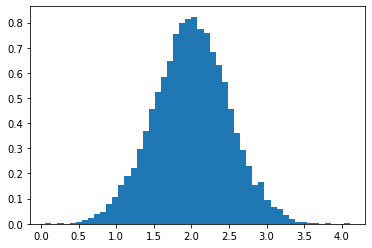

In [139]:
# Plot a normalized histogram with 50 bins
plt.hist(v,bins=50,normed=1)
plt.show()

In [141]:
N_Bins = np.histogram(v,bins=50,normed=True)

/A/develop/ide/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  """Entry point for launching an IPython kernel.


In [145]:
N_Bins[0].shape

(50,)

In [146]:
N_Bins[1].shape

(51,)

In [148]:
N_Bins[0]

array([0.00123406, 0.        , 0.00123406, 0.        , 0.00370219,
       0.00617032, 0.01480878, 0.02221317, 0.03949007, 0.0456604 ,
       0.07898015, 0.10736364, 0.15549217, 0.18881192, 0.22213167,
       0.29864369, 0.36898539, 0.45783805, 0.52571162, 0.58494673,
       0.64788404, 0.75401361, 0.79967401, 0.81571686, 0.82312124,
       0.77622678, 0.75648174, 0.68243785, 0.62937307, 0.56520169,
       0.45783805, 0.36281506, 0.2949415 , 0.23077012, 0.1542581 ,
       0.16659875, 0.09625706, 0.06787357, 0.05800105, 0.03331975,
       0.01974504, 0.00617032, 0.00863845, 0.00370219, 0.00370219,
       0.        , 0.00123406, 0.        , 0.        , 0.00123406])

In [149]:
N_Bins[1]

array([0.0548622 , 0.13589522, 0.21692824, 0.29796126, 0.37899428,
       0.4600273 , 0.54106032, 0.62209334, 0.70312636, 0.78415937,
       0.86519239, 0.94622541, 1.02725843, 1.10829145, 1.18932447,
       1.27035749, 1.35139051, 1.43242353, 1.51345655, 1.59448957,
       1.67552259, 1.75655561, 1.83758863, 1.91862165, 1.99965467,
       2.08068769, 2.16172071, 2.24275373, 2.32378675, 2.40481977,
       2.48585279, 2.56688581, 2.64791883, 2.72895185, 2.80998487,
       2.89101789, 2.97205091, 3.05308393, 3.13411695, 3.21514997,
       3.29618298, 3.377216  , 3.45824902, 3.53928204, 3.62031506,
       3.70134808, 3.7823811 , 3.86341412, 3.94444714, 4.02548016,
       4.10651318])

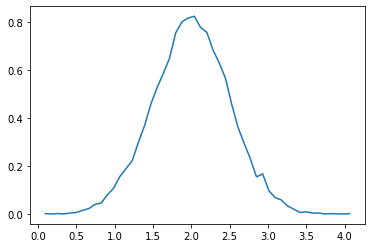

In [150]:
plt.plot(.5*(bins[1:]+bins[:-1]),n)
plt.show()

/A/develop/ide/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  


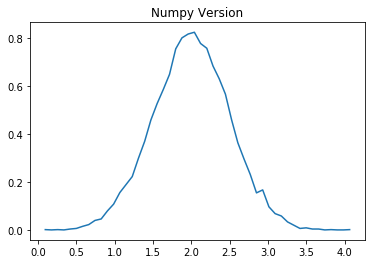

In [153]:
# Compute the histogram with numpy and then plot it
(n, bins) = np.histogram(v, bins=50, normed=True)  # NumPy version (no plot)
plt.plot(.5*(bins[1:]+bins[:-1]), n)
plt.title('Numpy Version')
plt.show()